# Visualizing hypergraphs

Visualizing hypergraphs, just like pairwise networks, is a hard task and no algorithm can work nicely for any given input structure. Here, we show how to visualize some toy structures using the visualization function contained in the ```drawing``` module that is often inspired by [networkx](https://networkx.org/documentation/stable/reference/drawing.html) and relies on [matplotlib](https://matplotlib.org/).

In [1]:
import matplotlib.pyplot as plt
import itertools
import numpy as np
import random
import xgi

## Basics

Les us first create a small toy hypergraph containing edges of different sizes.

In [2]:
H = xgi.Hypergraph()
H.add_edges_from(
    [[1, 2, 3], [3, 4, 5], [3, 6], [6, 7, 8, 9], [1, 4, 10, 11, 12], [1, 4]]
)

It can be quickly visualized simply with

(<Axes: >,
 (<matplotlib.collections.PathCollection at 0x1326e4fa0>,
  <matplotlib.collections.PatchCollection at 0x1326e42e0>))

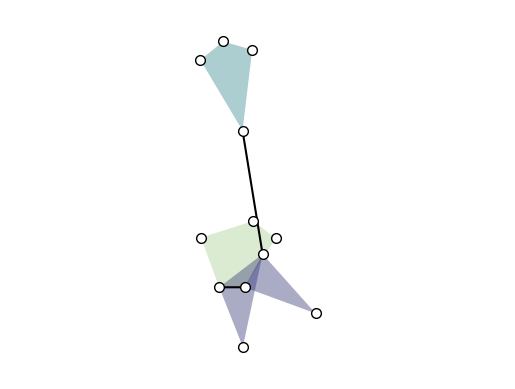

In [3]:
xgi.draw(H)

By default, the **layout** is computed by ```xgi.barycenter_spring_layout```. For a bit more control, 
we can compute a layout externally (that we fix with a random seed), so that we can reuse it:

(<Axes: >,
 (<matplotlib.collections.PathCollection at 0x1330ac730>,
  <matplotlib.collections.PatchCollection at 0x1330ac820>))

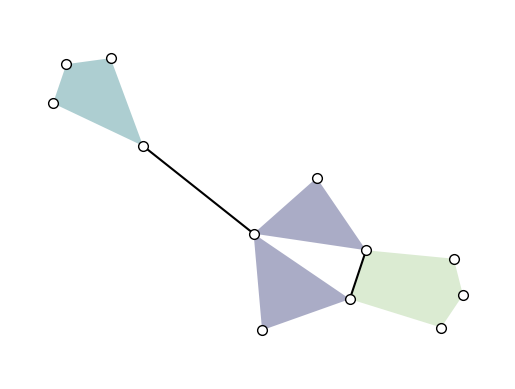

In [4]:
pos = xgi.barycenter_spring_layout(H, seed=1)

fig, ax = plt.subplots()
xgi.draw(H, pos=pos, ax=ax)

**Labels** can be added to the nodes and hyperedges with arguments `node_labels` and `hyperedge_labels`. If ```True```, the IDs are shown. To display user-defined labels, pass a dictionary that contains (id: label). Additional keywords related to the font can be passed as well:

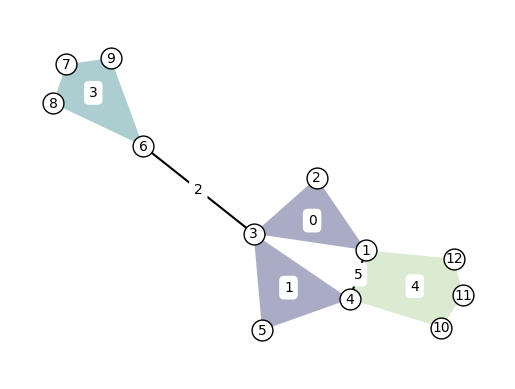

In [5]:
xgi.draw(H, pos, node_labels=True, node_size=15, hyperedge_labels=True)
plt.show()

Note that by default, the nodes are drawn too small (size 7) to display the labels nicely. For better visuals, increase the node size to at least 15 when displaying node labels.

## Other types of visualizations 

Another common way of visualizing hypergraph is with **convex hulls** as hyperedges. This can be done simply by setting `hull=True`:

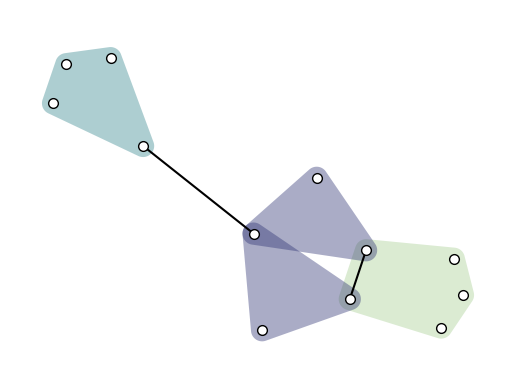

In [6]:
fig, ax = plt.subplots()
xgi.draw(H, pos=pos, ax=ax, hull=True)

plt.show()

XGI also offer a function to visualize a hypergraph as a **multilayer**, where each layer contains hyperedges of a given order:

/Users/maxime/Dropbox (ISI Foundation)/WORK/SCIENCE/xgi/xgi/drawing/draw.py:1479: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  node_collection = ax.scatter(


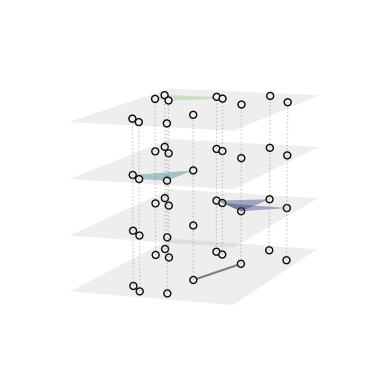

In [7]:
ax3 = plt.axes(projection="3d") # requires a 3d axis
xgi.draw_multilayer(H, ax=ax3)

plt.show()
plt.delaxes(ax3) # this is only to solve a bug in test notebooks

## Colors and sizes

The drawing functions offer great flexibility in choosing the width, size, and color of the elements that are drawn. 

By default, hyperedges are colored according to their order. Hyperedge and node colors can be set manually to a single color, a list of colors, or a by an array/dict/Stat of numerical values. 

In the latter case, numerical values are mapped to colors via a colormap which can be changed manually (see [colormaps](https://matplotlib.org/stable/tutorials/colors/colormaps.html) for details):

First, let's use single values:

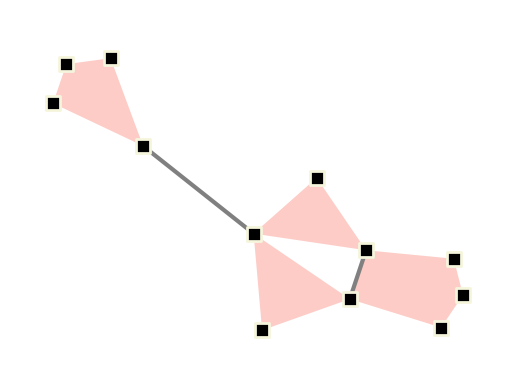

In [8]:
fig, ax = plt.subplots()

xgi.draw(
    H,
    pos=pos,
    ax=ax,
    node_fc="k",
    node_ec="beige",
    node_shape="s",
    node_size=10,
    node_lw=2,
    edge_fc="salmon",
    dyad_color="grey",
    dyad_lw=3
)

plt.show()

Now we can use statistic to set the colors and sizes, and change the colormaps:

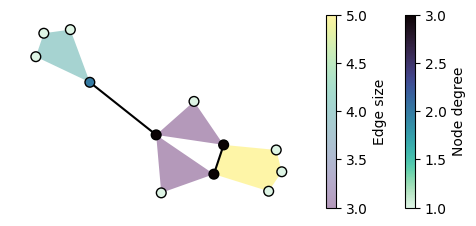

In [9]:
fig, ax = plt.subplots(figsize=(6, 2.5))

ax, collections = xgi.draw(
    H, pos=pos, node_fc=H.nodes.degree, edge_fc=H.edges.size, edge_fc_cmap="viridis", node_fc_cmap="mako_r"
)

node_col, _, edge_col = collections

plt.colorbar(node_col, label="Node degree")
plt.colorbar(edge_col, label="Edge size")

plt.show()

## Layouts

Other layout algorithms are available:
* ```random_layout```: to position nodes uniformly at random in the unit square ([exactly as networkx](https://networkx.org/documentation/stable/reference/generated/networkx.drawing.layout.random_layout.html)).
* ```pairwise_spring_layout```: to position the nodes using the Fruchterman-Reingold force-directed algorithm on the projected graph. In this case the hypergraph is first projected into a graph (1-skeleton) using the ```xgi.convert_to_graph(H)``` function and then networkx's [spring_layout](https://networkx.org/documentation/stable/reference/generated/networkx.drawing.layout.spring_layout.html) is applied. 
* ```barycenter_spring_layout```: to position the nodes using the Fruchterman-Reingold force-directed algorithm using an augmented version of the the graph projection of the hypergraph, where _phantom nodes_ (that we call barycenters) are created for each edge of order $d>1$ (composed by more than two nodes). Weights are then assigned to all hyperedges of order 1 (links) and to all connections to phantom nodes within each hyperedge to keep them together. Weights scale with the size of the hyperedges. Finally, the weighted version of networkx's [spring_layout](https://networkx.org/documentation/stable/reference/generated/networkx.drawing.layout.spring_layout.html) is applied.
* ```weighted_barycenter_spring_layout```: same as ```barycenter_spring_layout```, but here the weighted version of the Fruchterman-Reingold force-directed algorithm is used. Weights are assigned to all hyperedges of order 1 (links) and
    to all connections to phantom nodes within each hyperedge to keep them together. Weights scale with the order of the group interaction.
    
Each layout returns a dictionary that maps nodes ID into (x, y) coordinates.

For example:

(<Axes: >,
 (<matplotlib.collections.PathCollection at 0x13358dd60>,
  <matplotlib.collections.PatchCollection at 0x1335ca700>))

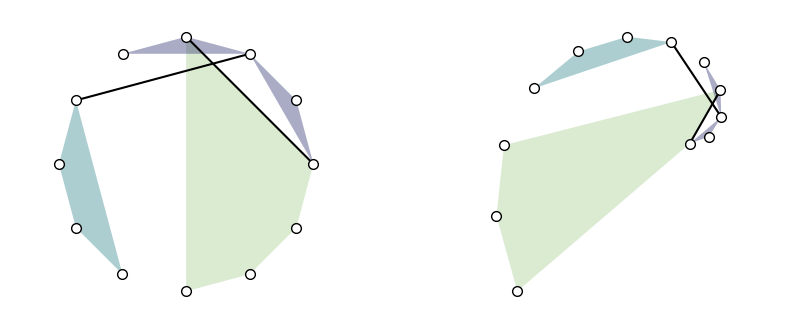

In [10]:
plt.figure(figsize=(10, 4))

ax = plt.subplot(1, 2, 1)
pos_circular = xgi.circular_layout(H)
xgi.draw(H, pos=pos_circular, ax=ax)

ax = plt.subplot(1, 2, 2)
pos_spiral = xgi.spiral_layout(H)
xgi.draw(H, pos=pos_spiral, ax=ax)

## Simplicial complexes

Simplicial complexes can be visualized using the same functions as for Hypergraphs.

**Technical note:**
By definition, a simplicial complex object contains all sub-simplices. This would make the visualization heavy since all sub-simplices contained in a maximal simplex would overlap. The automatic solution for this, implemented by default in all the layouts, is to convert the simplicial complex into a hypergraph composed solely by its maximal simplices.

**Visual note:**
To visually distinguish simplicial complexes from hypergraphs, the ```draw``` function will also show all links contained in each maximal simplices (while omitting simplices of intermediate orders). 

In [11]:
SC = xgi.SimplicialComplex()
SC.add_simplices_from([[3, 4, 5], [3, 6], [6, 7, 8, 9], [1, 4, 10, 11, 12], [1, 4]])

In [12]:
pos = xgi.barycenter_spring_layout(SC, seed=1)

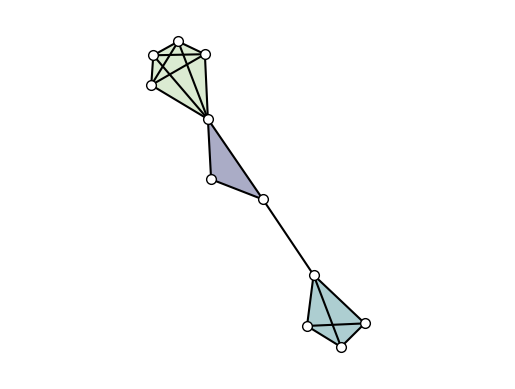

In [13]:
xgi.draw(SC, pos=pos)

plt.show()

## Rotating a hypergraph

For some hypergraphs, it can be helpful to rotate the positions of the nodes relative to the principal axis. We can do this by generating node positions with any of the functions previously described and then using the function `pca_transform()`. For example:

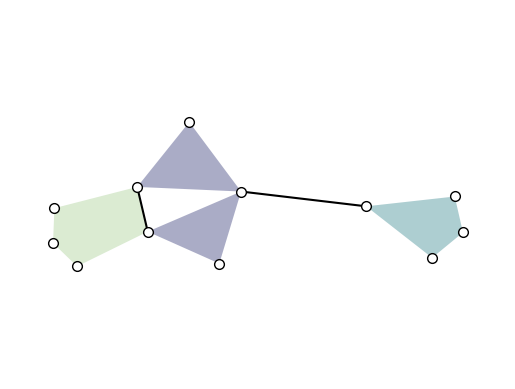

In [14]:
pos = xgi.barycenter_spring_layout(H, seed=1)

transformed_pos = xgi.pca_transform(pos)
xgi.draw(H, transformed_pos)

plt.show()

We can also rotate the node positions relative to the principal axis:

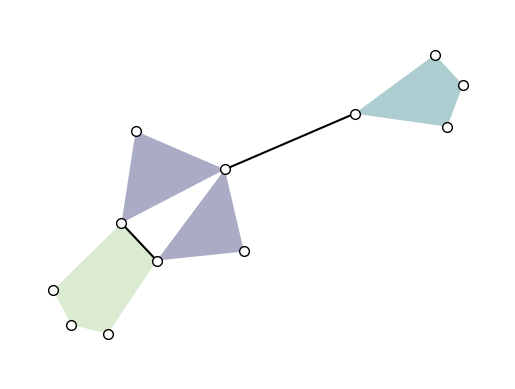

In [15]:
# rotation in degrees
transformed_pos = xgi.pca_transform(pos, 30)
xgi.draw(H, transformed_pos)

plt.show()

## Larger example: generative model
We generate and visualize a [random hypergraph](https://doi.org/10.1093/comnet/cnx001).

In [16]:
n = 100
is_connected = False
while not is_connected:
    H = xgi.random_hypergraph(n, [0.03, 0.0002, 0.00001])
    is_connected = xgi.is_connected(H)
pos = xgi.barycenter_spring_layout(H, seed=1)

Since there are more nodes we reduce the ```node_size```.

(<Axes: >,
 (<matplotlib.collections.PathCollection at 0x13362f370>,
  <matplotlib.collections.PatchCollection at 0x13370ad90>))

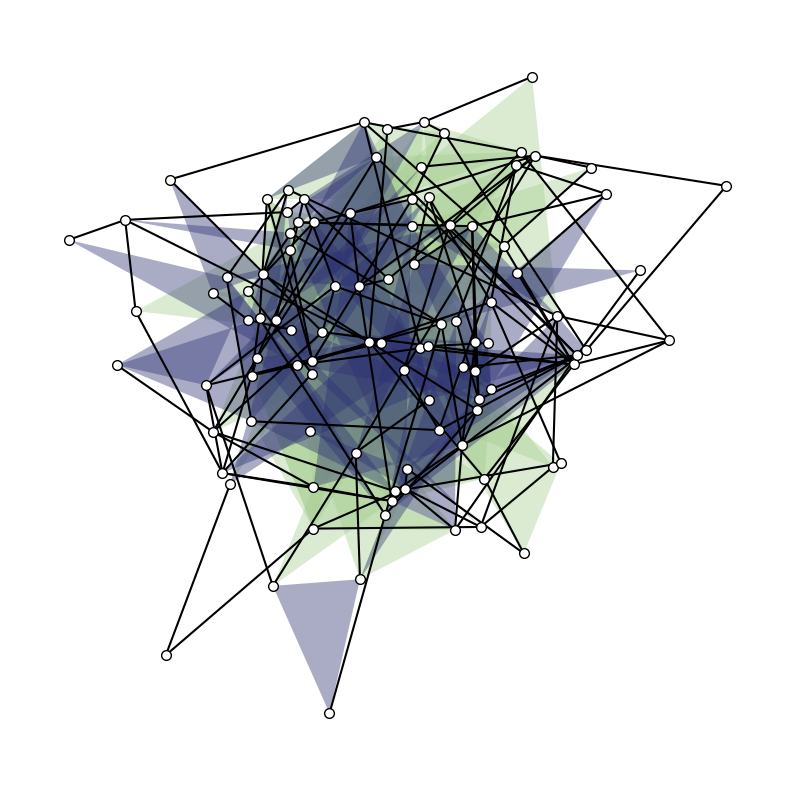

In [17]:
plt.figure(figsize=(10, 10))
ax = plt.subplot(111)
xgi.draw(H, pos=pos, ax=ax)

We can even size/color the nodes and edges by NodeStats or EdgeStats (e.g., degree, centrality, size, etc.)!

## Degree distribution
Using its simplest (higher-order) definition, the degree is the number of hyperedges (of any size) incident on a node.

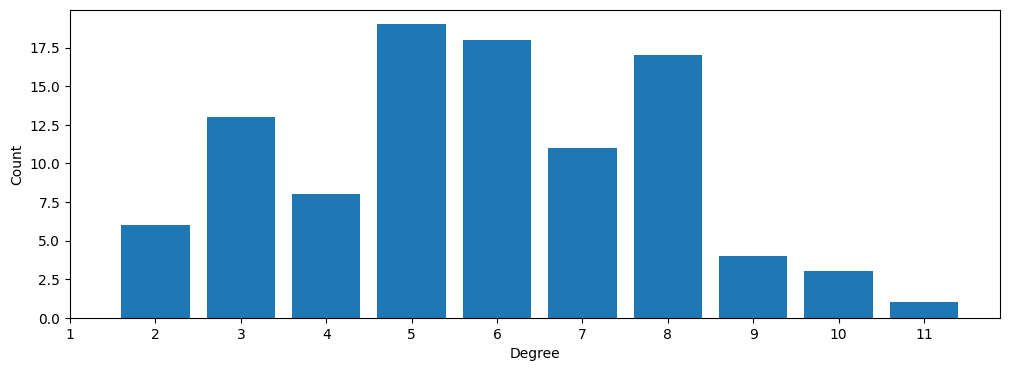

In [18]:
centers, heights = xgi.degree_histogram(H)

plt.figure(figsize=(12, 4))
ax = plt.subplot(111)

ax.bar(centers, heights)
ax.set_ylabel("Count")
ax.set_xlabel("Degree")
ax.set_xticks(np.arange(1, max(centers) + 1, step=1));